In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow
# tensorflow.keras.__version__

C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
# Read in csv (already transformed)
faciltiies_df = pd.read_csv('..//..//data/facilities/All_Facilities.csv')

# Drop columns not need for modeling
df = faciltiies_df.drop(['Description', 'FAC_NO', 'FAC_NAME','FAC_STR_ADDR','FAC_CITY','FAC_PHONE','FAC_ADMIN_NAME','FAC_OPERATED_THIS_YR','FAC_OP_PER_BEGIN_DT','FAC_OP_PER_END_DT','FAC_PAR_CORP_NAME','FAC_PAR_CORP_BUS_ADDR','FAC_PAR_CORP_CITY','FAC_PAR_CORP_STATE','REPT_PREP_NAME','SUBMITTED_DT','LICENSE_NO','LICENSE_EFF_DATE','LICENSE_EXP_DATE','LICENSE_STATUS','FACILITY_LEVEL','REV_REPT_PREP_NAME','REVISED_DT','CORRECTED_DT','ASSEMBLY_DIST','SENATE_DIST','CONGRESS_DIST','CENS_TRACT','MED_SVC_STUDY_AREA','LA_COUNTY_SVC_PLAN_AREA','COUNTY','RURAL_HEALTH_CLINIC'], axis=1)

# Format Categorical Data
df.HEALTH_SVC_AREA = df.HEALTH_SVC_AREA.str[:2]
df.LIC_CAT = df.LIC_CAT == "Community Clinic"
df.FED_QUALIFIED = df.FED_QUALIFIED != "Neither"
df.PRIMARY_NON_ENGLISH_LANG = df.PRIMARY_NON_ENGLISH_LANG == "Spanish"
df.replace(False, 0, inplace=True)

# Drop final coloumns
df.drop(df.iloc[:, 489:551], inplace=True, axis=1)

df.head()

C:\Users\tawnyn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33,534,568) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FAC_ZIP,FAC_PAR_CORP_ZIP,LONGITUDE,LATITUDE,HEALTH_SVC_AREA,LIC_CAT,FED_QUALIFIED,COM_SERV_ADULT_DAY_CARE,COM_SERV_CHILD_CARE,COM_SERV_COM_EDUC,...,UTILITIES_OPER_EXP_INC_STATEMENT,PROF_LIABILITY_INSURANCE_OPER_EXP_INC_STATEMENT,OTH_INSURANCE_OPER_EXP_INC_STATEMENT,CONTINUING_ED_OPER_EXP_INC_STATEMENT,INFO_TECH_EHR_OPER_EXP_INC_STATEMENT,ALL_OTH_EXP_INC_STATEMENT,TOT_OPER_EXP_INC_STATEMENT,NET_FROM_OPER_INC_STATEMENT,Target,Label
0,94577,94612,-122.165040,37.704730,05,1.0,0.0,1,0,1,...,73123,88338,0,0,0,4171395,17602967,-1003497,0.519794,1.0
1,94709,0,-122.273185,37.874755,05,1.0,0.0,0,0,0,...,57925,22053,13112,15191,15499,133387,4856964,-5349,0.154921,0.0
2,94621,94607,-122.185760,37.758600,05,1.0,1.0,0,0,0,...,46034,7052,21453,0,227587,368620,4190931,217131,0.173184,0.0
3,94566,94588,-121.873710,37.661450,05,1.0,1.0,0,0,1,...,70859,0,0,1721,50581,595241,1703243,-733980,0.169316,0.0
4,94607,94607,-122.287950,37.804410,05,1.0,1.0,0,0,1,...,118282,12929,104130,0,470978,1929729,19065530,-4516404,0.197962,0.0


In [3]:
# Retrive all possible inputs
features = df.iloc[:, 0:489]
features

,FAC_ZIP,FAC_PAR_CORP_ZIP,LONGITUDE,LATITUDE,HEALTH_SVC_AREA,LIC_CAT,FED_QUALIFIED,COM_SERV_ADULT_DAY_CARE,COM_SERV_CHILD_CARE,COM_SERV_COM_EDUC,...,OUTSIDE_PAT_CARE_SERV_OPER_EXP_INC_STATEMENT,RENT_DEPRECIATION_OPER_EXP_INC_STATEMENT,UTILITIES_OPER_EXP_INC_STATEMENT,PROF_LIABILITY_INSURANCE_OPER_EXP_INC_STATEMENT,OTH_INSURANCE_OPER_EXP_INC_STATEMENT,CONTINUING_ED_OPER_EXP_INC_STATEMENT,INFO_TECH_EHR_OPER_EXP_INC_STATEMENT,ALL_OTH_EXP_INC_STATEMENT,TOT_OPER_EXP_INC_STATEMENT,NET_FROM_OPER_INC_STATEMENT
0,94577,94612,-122.165040,37.704730,05,1.0,0.0,1,0,1,...,6086638,1064393,73123,88338,0,0,0,4171395,17602967,-1003497
1,94709,0,-122.273185,37.874755,05,1.0,0.0,0,0,0,...,0,282405,57925,22053,13112,15191,15499,133387,4856964,-5349
2,94621,94607,-122.185760,37.758600,05,1.0,1.0,0,0,0,...,0,140740,46034,7052,21453,0,227587,368620,4190931,217131
3,94566,94588,-121.873710,37.661450,05,1.0,1.0,0,0,1,...,6280,112284,70859,0,0,1721,50581,595241,1703243,-733980
4,94607,94607,-122.287950,37.804410,05,1.0,1.0,0,0,1,...,0,516427,118282,12929,104130,0,470978,1929729,19065530,-4516404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,95961,95991,-121.551076,39.097314,02,1.0,1.0,0,0,0,...,28822,216419,98524,0,6809,2753,0,158198,7600228,738395
1157,95919,95833,-121.281559,39.447018,02,1.0,0.0,0,0,0,...,0,71460,21458,4690,4072,0,0,143548,1632213,-109524
1158,95901,95901,-121.565520,39.118680,02,1.0,1.0,0,0,1,...,34987,619603,146651,9121,73730,10301,457867,1817881,9133370,-709689
1159,95901,95901,-121.594602,39.139861,02,1.0,1.0,0,0,1,...,11102,42437,18992,2889,3080,4699,2620,130274,1415984,802973


## Data Pre-Processing

In [4]:
# Define X and y
X = features
y = df["Label"]
print(X.shape, y.shape)

(1161, 489) (1161,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)

In [6]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [8]:
# # Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=489))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               49000     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 79,502
Trainable params: 79,502
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
777/777 - 0s - loss: 0.6689 - acc: 0.6100
Epoch 2/100
777/777 - 0s - loss: 0.6031 - acc: 0.6589
Epoch 3/100
777/777 - 0s - loss: 0.4904 - acc: 0.7748
Epoch 4/100
777/777 - 0s - loss: 0.3749 - acc: 0.8263
Epoch 5/100
777/777 - 0s - loss: 0.2792 - acc: 0.8880
Epoch 6/100
777/777 - 0s - loss: 0.2474 - acc: 0.8906
Epoch 7/100
777/777 - 0s - loss: 0.2234 - acc: 0.9022
Epoch 8/100
777/777 - 0s - loss: 0.1714 - acc: 0.9369
Epoch 9/100
777/777 - 0s - loss: 0.1201 - acc: 0.9550
Epoch 10/100
777/777 - 0s - loss: 0.1115 - acc: 0.9614
Epoch 11/100
777/777 - 0s - loss: 0.0979 - acc: 0.9717
Epoch 12/100
777/777 - 0s - loss: 0.0764 - acc: 0.9768
Epoch 13/100
777/777 - 0s - loss: 0.0803 - acc: 0.9755
Epoch 14/100
777/777 - 0s - loss: 0.0569 - acc: 0.9781
Epoch 15/100
777/777 - 0s - loss: 0.0549 - acc: 0.9807
Epoch 16/100
777/777 - 0s - loss: 0.0556 - acc: 0.9794
Epoch 17/100
777/777 - 0s - loss: 0.0589 - acc: 0.9807
Epoch 18/100
777/777 - 0s - loss: 0.0565 - acc: 0.9807
Epoch 19/100
777/77

## Quantify our Trained Model

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=3)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 146.79994709293047, Accuracy: 0.796875


## Make Predictions

In [15]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [16]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [0. 0. 1. 0. 0.]
Actual Labels: [0.0, 0.0, 0.0, 0.0, 0.0]


In [17]:
from sklearn.metrics import confusion_matrix
y_true = y_test[:5]
y_pred = prediction_labels
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [0, 0]], dtype=int64)

In [18]:
from sklearn.metrics import cohen_kappa_score
y_true = y_test[:5]
y_pred = prediction_labels
cohen_kappa_score(y_true, y_pred)

0.0

In [19]:
predictions = model.predict_classes(X_test_scaled)
labels = label_encoder.inverse_transform(predictions)
actual = list(labels)
predicted = list(y_test)

In [20]:
from sklearn.metrics import confusion_matrix
y_true = actual
y_pred = predicted
confusion_matrix(y_true, y_pred)

array([[189,  41],
       [ 37, 117]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
y_true = actual
y_pred = predicted
target_names = ['class 0 - false', 'class 1 - true']
print(classification_report(y_true, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

class 0 - false       0.84      0.82      0.83       230
 class 1 - true       0.74      0.76      0.75       154

       accuracy                           0.80       384
      macro avg       0.79      0.79      0.79       384
   weighted avg       0.80      0.80      0.80       384



In [22]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [23]:
# Train the model with GridSearch
clf = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.750, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.808, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.826, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.716, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.755, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.750, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.808, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.826, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.716, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.755, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.827, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.813, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.742, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.729, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.763, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.827, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.813, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.6s finished


In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.786368899917287


In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)

clf.fit(X_train, y_train)

clf.predict(X_test)

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

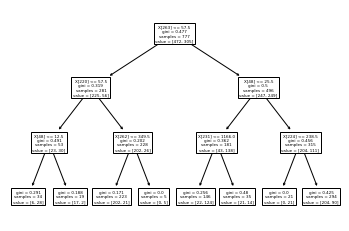

In [26]:
tree.plot_tree(clf);

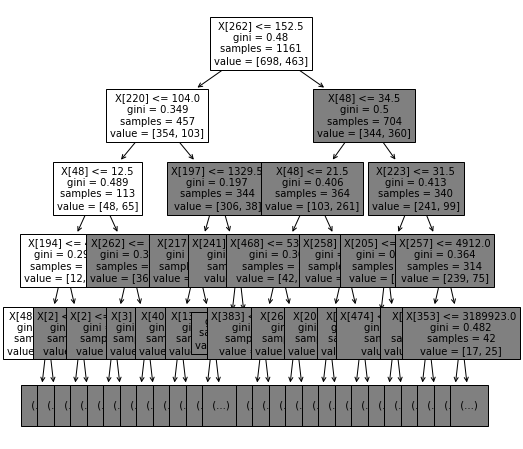

In [35]:
clf = tree.DecisionTreeClassifier()
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(clf.fit(X, y), max_depth=4, fontsize=10)
plt.show()

In [28]:
X.iloc[:, [263]]

,DIGESTIVE_SYS_DISEASE_ENC
0,360
1,0
2,162
3,0
4,269
...,...
1156,1468
1157,220
1158,370
1159,338


In [29]:
X.iloc[:, [220]]

,TOT_MALE_PATS_BY_AGE
0,87
1,1944
2,1843
3,197
4,3249
...,...
1156,5551
1157,1084
1158,4935
1159,4661


In [30]:
X.iloc[:, [48]]

,PERCENT_PATS_POP_NON_ENGLISH
0,56
1,0
2,35
3,11
4,11
...,...
1156,28
1157,1
1158,22
1159,13


In [31]:
X.iloc[:, [197]]

,MORE_THAN_ONE_RACE_PATS
0,0
1,333
2,24
3,11
4,25
...,...
1156,2587
1157,0
1158,183
1159,233


In [32]:
X.iloc[:, [233]]

,OTHER_PAYERS_PATS
0,0
1,0
2,0
3,0
4,0
...,...
1156,159
1157,26
1158,0
1159,0


In [33]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, y_train)

rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [34]:
fn=X
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

KeyError: 263